In [ ]:
import pandas as pd
import pyarrow
from datetime import datetime, timedelta
import calendar
# from prophet import Prophet
# from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [1]:
# !pip install pyarrow --user
# !pip install fastparquet --user

## Input data 

In [35]:
input_df=pd.read_csv('data/input_data_2.csv')

In [36]:
input_df

,date_balance,code_product,cnt,active_cnt,dpd30_cnt,dpd1_cnt,max_dpd
0,2024-11-10,PL06,434038,78515,3812,6850,86
1,2024-11-10,RC02,296750,284297,26366,32371,404
2,2024-11-10,RC01,5396,4476,455,706,398
3,2024-11-09,RC01,5396,4476,457,457,397
4,2024-11-09,RC02,296611,284158,26417,32921,403
...,...,...,...,...,...,...,...
1510,2023-06-26,PL06,255430,110141,13370,22044,87
1511,2023-06-26,RC02,75384,73702,3473,4701,143
1512,2023-06-25,PL06,255205,110279,13289,22473,86
1513,2023-06-25,RC02,74483,72805,3477,4718,142


In [37]:
input_df=input_df[input_df['code_product']=='PL06']

In [38]:
input_df.columns=['date_balance','code_product','cnt','active_cnt','dpd30_cnt','dpd1_cnt','max_dpd']

In [39]:
input_df.loc[:, 'dpd1_rate'] = input_df['dpd1_cnt'] / input_df['cnt']
input_df.loc[:, 'dpd30_rate'] = input_df['dpd30_cnt'] / input_df['cnt']

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [40]:
# input_df=pd.read_csv('data/input_data.csv')
# input_df.columns=['index','date_balance','cnt','dpd30_cnt','rate','predict']
# input_df.to_parquet('data/input_data.parquet',engine='pyarrow')

In [41]:
input_df.to_parquet('data/input_data.parquet',engine='pyarrow')

In [42]:
def nearest_4th_diff(date_str):
    date = datetime.strptime(date_str, '%Y-%m-%d')
    if date.day >= 4:
        # If the day of the given date is after the 4th, use the 4th of the same month
        nearest_4th_date = date.replace(day=4)
    else:
        # If the day is on or before the 4th, go to the previous month
        previous_month = date.replace(day=1) - timedelta(days=1)
        nearest_4th_date = previous_month.replace(day=4)
    
    # Calculate the difference in days
    date_diff = (date - nearest_4th_date).days
    return nearest_4th_date.strftime('%Y-%m-%d'), date_diff

In [43]:
def month_and_days(date_str):
    date = datetime.strptime(date_str, '%Y-%m-%d')
    month_number = date.month
    days_in_month = calendar.monthrange(date.year, date.month)[1]
    return month_number, days_in_month


In [44]:
input_df=pd.read_parquet('data/input_data.parquet')

In [45]:
input_df[['nearest_4th', 'date_diff']] = input_df['date_balance'].apply(nearest_4th_diff).apply(pd.Series)
input_df[['month_number', 'days_in_month']] = input_df['date_balance'].apply(month_and_days).apply(pd.Series)


In [46]:
input_df.to_parquet('data/input_data.parquet',engine='pyarrow')

In [47]:
display(input_df.columns)
display(input_df.shape)

Index(['date_balance', 'code_product', 'cnt', 'active_cnt', 'dpd30_cnt',
       'dpd1_cnt', 'max_dpd', 'dpd1_rate', 'dpd30_rate', 'nearest_4th',
       'date_diff', 'month_number', 'days_in_month'],
      dtype='object')

(505, 13)

## Overview 

The trend so seasonal fluctuation which drammatically increase on due date ( 4th monthly ) drop after ward


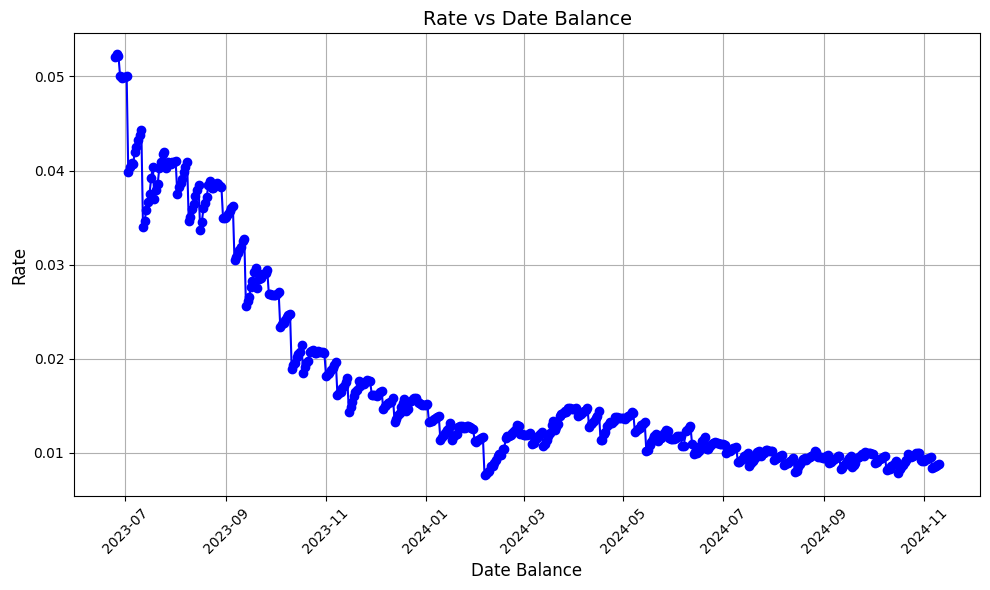

In [48]:
# Assuming input_df is already defined and contains 'date_balance' and 'rate' columns
# First, we will convert 'date_balance' to a datetime object to ensure proper plotting
input_df['date_balance'] = pd.to_datetime(input_df['date_balance'])

# Plotting the 'rate' values over 'date_balance'
plt.figure(figsize=(10, 6))
plt.plot(input_df['date_balance'], input_df['dpd30_rate'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Rate vs Date Balance', fontsize=14)
plt.xlabel('Date Balance', fontsize=12)
plt.ylabel('Rate', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
print('The trend so seasonal fluctuation which drammatically increase on due date ( 4th monthly ) drop after ward')
# Display the plot
plt.show()

The trend so seasonal fluctuation which drammatically increase on due date ( 4th monthly ) drop after ward


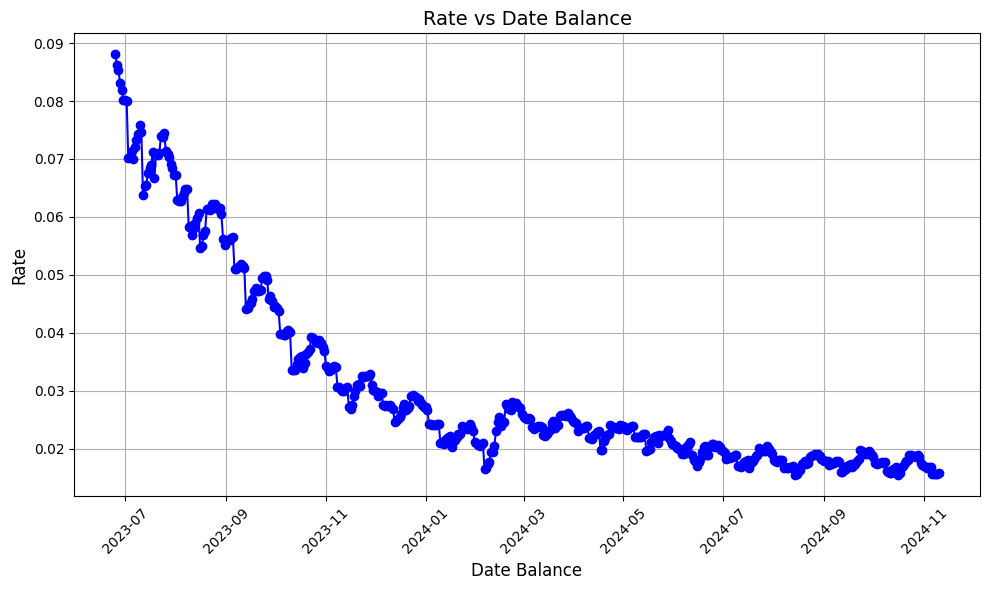

In [49]:
# Assuming input_df is already defined and contains 'date_balance' and 'rate' columns
# First, we will convert 'date_balance' to a datetime object to ensure proper plotting
input_df['date_balance'] = pd.to_datetime(input_df['date_balance'])

# Plotting the 'rate' values over 'date_balance'
plt.figure(figsize=(10, 6))
plt.plot(input_df['date_balance'], input_df['dpd1_rate'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Rate vs Date Balance', fontsize=14)
plt.xlabel('Date Balance', fontsize=12)
plt.ylabel('Rate', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
print('The trend so seasonal fluctuation which drammatically increase on due date ( 4th monthly ) drop after ward')
# Display the plot
plt.show()